In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import the MLPClassifier from neural_network from sklearn
from sklearn.neural_network import MLPClassifier
#import the pipeline from sklearn
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE

In [61]:
estimators = []

ac = pd.read_csv('accidents_preprocessed.csv')
ac = ac.drop(columns=['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude'])
ac.head()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,...,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,...,0,0,4,1,7,124,1,7,6,1
4,2,1,11,2,994.0,3,-1,20,5,4,...,-1,-1,1,2,5,125,1,6,7,1


### Preprocess Target class casualty_severity
#### -Note:  Fatal and Serious together in one class and slight in the other

In [62]:

ac['casualty_severity'] = ac['casualty_severity'].replace(2, 1)
ac['casualty_severity'] = ac['casualty_severity'].replace(3, 0)

ac[ac.casualty_severity == 1]

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
12,2,1,11,3,165.0,3,6,20,-1,4,...,0,0,1,1,7,1598,1,16,3,1
13,2,1,11,3,287.0,3,6,30,6,2,...,0,0,1,1,7,109,1,5,2,1
14,2,1,11,3,545.0,3,2,20,-1,4,...,0,0,4,1,6,124,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68795,1,3,7,7,30.0,3,6,60,0,-1,...,0,0,0,2,4,1400,1,15,7,3
68797,1,3,7,7,30.0,3,6,60,0,-1,...,0,0,0,2,4,1400,1,15,7,3
68799,2,1,7,7,960.0,-1,6,20,0,-1,...,0,0,3,2,9,1997,1,13,5,2
68803,1,1,7,7,1169.0,3,6,60,0,-1,...,0,0,1,1,8,998,1,20,10,1


In [63]:
one_hot_list = ['first_road_class', 'road_type', 'junction_detail', 'junction_control', 'light_conditions',
                'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',
                'urban_or_rural_area', 'trunk_road_flag', 'casualty_class', 'sex_of_casualty', 'car_passenger',
                'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile', 'towing_and_articulation',
                'vehicle_manoeuvre', 'vehicle_location_restricted_lane', 'junction_location',
                'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
                'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver', 'propulsion_code',
                'driver_imd_decile', 'driver_home_area_type']

#Maybe change speed limit
ordinal_list = ['number_of_vehicles', 'number_of_casualties', 'month', 'day_of_week', 'time', 'speed_limit',
                'age_band_of_casualty', 'age_band_of_driver', 'engine_capacity_cc', 'age_of_vehicle']

In [64]:
#Reset the indices
ac = ac.reset_index(drop=True)

ac.head(n=10)


,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,...,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,...,0,0,4,1,7,124,1,7,6,1
4,2,1,11,2,994.0,3,-1,20,5,4,...,-1,-1,1,2,5,125,1,6,7,1
5,2,1,11,2,970.0,-1,6,30,3,4,...,0,0,3,1,6,998,1,3,2,1
6,2,1,11,2,1226.0,4,6,20,3,2,...,0,0,1,1,7,125,1,0,5,1
7,1,1,11,2,1350.0,3,1,40,1,4,...,0,0,1,1,4,-1,-1,-1,6,1
8,2,1,11,2,1123.0,5,-1,30,0,-1,...,0,0,1,1,7,-1,-1,-1,-1,-1
9,2,1,11,2,1320.0,5,6,30,3,4,...,7,2,3,2,7,1499,2,2,1,1


In [65]:
accidents = ac.copy()

#replace missing (-1) values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=-1, strategy='mean')

y = accidents['casualty_severity']
accidents = accidents.drop(columns=['casualty_severity'])

one_hot_encoder = OneHotEncoder(sparse =True)
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        # use OneHotEncoder for Outlook and Wind
        ('encoder', OneHotEncoder(), one_hot_list),
        # use StandardScaler for Temperature and Humidity
        ('scaler', StandardScaler(), ordinal_list)
    ])

pipe = Pipeline(steps=[("preprocessor", preprocessor), ("imputer", imp), ("estimator", None)])

In [66]:
accidents

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,...,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,...,0,0,4,1,7,124,1,7,6,1
4,2,1,11,2,994.0,3,-1,20,5,4,...,-1,-1,1,2,5,125,1,6,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68800,2,2,7,7,1082.0,3,6,20,0,-1,...,0,0,3,2,9,998,1,2,7,1
68801,2,2,7,7,1082.0,3,6,20,0,-1,...,0,0,1,1,7,998,1,1,8,1
68802,2,1,7,7,1065.0,3,6,30,3,4,...,0,0,3,2,9,1498,1,1,7,1
68803,1,1,7,7,1169.0,3,6,60,0,-1,...,0,0,1,1,8,998,1,20,10,1


# First Splits and Models

In [67]:
y

0        1
1        1
2        0
3        0
4        0
        ..
68800    0
68801    0
68802    0
68803    1
68804    1
Name: casualty_severity, Length: 68805, dtype: int64

In [68]:
accidents

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,...,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,...,0,0,4,1,7,124,1,7,6,1
4,2,1,11,2,994.0,3,-1,20,5,4,...,-1,-1,1,2,5,125,1,6,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68800,2,2,7,7,1082.0,3,6,20,0,-1,...,0,0,3,2,9,998,1,2,7,1
68801,2,2,7,7,1082.0,3,6,20,0,-1,...,0,0,1,1,7,998,1,1,8,1
68802,2,1,7,7,1065.0,3,6,30,3,4,...,0,0,3,2,9,1498,1,1,7,1
68803,1,1,7,7,1169.0,3,6,60,0,-1,...,0,0,1,1,8,998,1,20,10,1


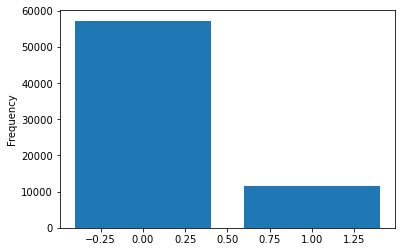

In [69]:
#Some Plots

class_dist = y.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

In [70]:
from imblearn.over_sampling import SMOTE
#Undersampling/Oversampling:

#sampler = RandomOverSampler()
#sampler = RandomUnderSampler()
sampler = SMOTE()
oversampler = RandomOverSampler()
undersampler = RandomUnderSampler()

X = accidents


In [71]:
#split test and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_balanced, y_balanced = sampler.fit_resample(X_train, y_train)
#class_dist = pd.Series(X_balanced).value_counts()
#plt.bar(class_dist.index, class_dist)
#plt.ylabel("Frequency")
#plt.show()

In [72]:
# Do Preprocessing without pipeline
X_onehot = X.copy()
X_onehot
encoded = pd.DataFrame(one_hot_encoder.fit_transform(X_onehot[one_hot_list]).toarray(),
                       columns=one_hot_encoder.get_feature_names(one_hot_list))
X_onehot = X_onehot.drop(columns=one_hot_list)
X_onehot = X_onehot.join(encoded)
X_onehot[:] = scaler.fit_transform(X_onehot[:])
#Scale all columns to Standard Distribution
X_onehot[:] = imp.fit_transform(X_onehot[:])
X_prep_train, X_prep_test, y_prep_train, y_prep_test = train_test_split(X_onehot, y, test_size=0.2, random_state=42, stratify=y)
X_prep_balanced, y_prep_balanced = sampler.fit_resample(X_prep_train, y_prep_train)

# Creating models

In [73]:
#Logistic Regression
weight_estimator = LogisticRegression(max_iter=20000)

#K-Nearest-Neighbors
neigh = KNeighborsClassifier(n_neighbors=3)

#Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0)

#Neural Network
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu',
learning_rate_init=1e-3, batch_size=64, verbose=True,
early_stopping=True, random_state=1234)


estimators = [clf, weight_estimator, neigh, model]
estimators

[MLPClassifier(batch_size=64, early_stopping=True,
               hidden_layer_sizes=(100, 100, 100), random_state=1234,
               verbose=True),
 LogisticRegression(max_iter=20000),
 KNeighborsClassifier(n_neighbors=3),
 RandomForestClassifier(random_state=0)]

# Run estimators

In [74]:
%%script false
#iterate over list
for estimator in estimators:
   print(estimator)
   pipe.set_params(estimator = estimator)
   pipe.fit(X_balanced, y_balanced)
   prediction = pipe.predict(X_test)
   print(classification_report(y_test, prediction))

Couldn't find program: 'false'


In [75]:
# Try with other scaler

for samp in [oversampler,undersampler]:
    X_b, y_b = samp.fit_resample(X_train,y_train)
    for estimator in estimators:

       print(estimator)
       pipe.set_params(estimator = estimator)
       #pipe.set_params(sampler = samp)
       pipe.fit(X_b, y_b)
       prediction = pipe.predict(X_test)
       print(classification_report(y_test, prediction))

MLPClassifier(batch_size=64, early_stopping=True,
              hidden_layer_sizes=(100, 100, 100), random_state=1234,
              verbose=True)
Iteration 1, loss = 0.58015015
Validation score: 0.707200
Iteration 2, loss = 0.53800389
Validation score: 0.711679
Iteration 3, loss = 0.48504477
Validation score: 0.758003
Iteration 4, loss = 0.43036995
Validation score: 0.779089
Iteration 5, loss = 0.38199166
Validation score: 0.802797
Iteration 6, loss = 0.34203069
Validation score: 0.815907
Iteration 7, loss = 0.30790028
Validation score: 0.839069
Iteration 8, loss = 0.27793757
Validation score: 0.839178
Iteration 9, loss = 0.25306051
Validation score: 0.852835
Iteration 10, loss = 0.22934661
Validation score: 0.858298
Iteration 11, loss = 0.21189555
Validation score: 0.856987
Iteration 12, loss = 0.19537874
Validation score: 0.873593
Iteration 13, loss = 0.17817126
Validation score: 0.882224
Iteration 14, loss = 0.16751884
Validation score: 0.874358
Iteration 15, loss = 0.15571773
Vali

ValueError: Found unknown categories [6] in column 27 during transform

In [ ]:
from imblearn.pipeline import Pipeline

#sampler = RandomUnderSampler()

#pipeline = Pipeline([ ('normalisation', transform), ('balancing', sampler), ('classification', estimator) ])

#accuracy_iris = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')

#print("Average Accuracy = {}%".format(accuracy_iris.mean() * 100.0))

In [ ]:
logreg2 = LogisticRegression(max_iter = 5000)
rfe = RFE(logreg2,20, verbose=1)
#pipe.set_params(estimator=rfe)
pipe.set_params(estimator= rfe)
pipe.fit(X_train,y_train)

In [ ]:
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
X_t = X_prep_train[X_prep_train.columns[rfe.support_]]
import statsmodels.api as sm
logit_model = sm.Logit(y_prep_train,X_t)
result = logit_model.fit()
print(result.summary2())

In [ ]:
#logreg2.fit(X_t, y_train)
#pred = logreg2.predict(X_test[X_test.columns[rfe.support_]])
#print("Accuracy: " , logreg2.score(X_test[X_test.columns[rfe.support_]],y_test))

X_prep_test2 = X_prep_test[X_prep_test.columns[rfe.support_]]
pred = logit_model.predict(logit_model)
accuracy_score(y_prep_train, pred)

In [ ]:
X_prep_test2